In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords                
from nltk import word_tokenize, sent_tokenize
import re
# from nltk.stem import WordNetLemmatizer # 同义词转述
from nltk.stem import WordNetLemmatizer # 同义词转述

import keras
from keras import models
from keras.preprocessing.text import one_hot, Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential,load_model
from keras.layers import Dense, Flatten, Embedding, LSTM, SpatialDropout1D, Input, Bidirectional,Dropout
from keras.layers import Dropout , Activation, GRU, TimeDistributed,Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D,MaxPooling1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2

from keras import backend as K

import gensim
from gensim.models import Word2Vec

from keras.engine.topology import Layer, InputSpec

import re
import pandas as pd
from gensim.models import word2vec
import numpy as np
from sklearn.decomposition import PCA
# from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import RandomForestRegressor as RF
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split

Using TensorFlow backend.


In [2]:
df_01 = pd.read_csv('train_data.csv',lineterminator='\n')
df_02 = pd.read_csv('20190603_test.csv',lineterminator='\n')
df_01.head()

,ID,review,label
0,1,Jo bhi ap se tou behtar hoon,Negative
1,2,ya Allah meri sister Affia ki madad farma,Positive
2,3,Yeh khud chahta a is umar main shadi krna. ha...,Negative
3,4,Tc ? Apky mun xe exe alfax achy nae lgty 😒💃,Negative
4,5,Good,Positive


In [3]:
def label2vector(x):
    if(x=='Negative'):
        return 0
    else:
        return 1

In [4]:
df_01['sentiment'] = df_01['label'].apply(label2vector)

In [5]:
df_02

,ID,review
0,1,Agar ap ne playstaion me country us select ki ...
1,2,Allah pak maa s bhtr taqdeer likhta h
2,3,ALLAH KISI MAA KO IMRAN KHAN NA DEY...AMEEN
3,4,Heer Naqvi
4,5,Soch dekho hamari kitni milti hai 😉😂
5,6,Raja Perveez ka kehna hai ke Meera taxi le kar...
6,7,Bahot Slim Khubsurat Zabardast Mobile Hai
7,8,Nahi arsal piyar hi karta hy isKo
8,9,Ap humesah mera sath cahlakiyan krty hain....z...
9,10,My fv darama is jesa drama koi nhi. Shukria un...


In [6]:
df = pd.concat([df_01.drop(['label','ID'],axis=1),df_02.drop(['ID'],axis=1)],ignore_index=True)
df

/home/dyngq/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,review,sentiment
0,Jo bhi ap se tou behtar hoon,0.0
1,ya Allah meri sister Affia ki madad farma,1.0
2,Yeh khud chahta a is umar main shadi krna. ha...,0.0
3,Tc ? Apky mun xe exe alfax achy nae lgty 😒💃,0.0
4,Good,1.0
5,American president John f Kennedy aur in ke bh...,0.0
6,"Commission aur kickback ka dor Dora raha, quo...",0.0
7,Allah pak nazer e bd sy bechye or humesha boha...,1.0
8,Amoman log samajhte hain ke jhok siyal hi Abid...,1.0
9,Akki KhanYani k tum ....... v good Wesy tum sh...,0.0


In [7]:
import re
from nltk.stem import WordNetLemmatizer # 同义词转述
# from nltk.corpus import stopwords # 删除停用词

# stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    text = re.sub(r'[^\w\s]',' ',text, re.UNICODE)
    text = re.sub(r"\\", "", text)    
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub(r"<br />", "", text) 
    text = re.sub(r"@", "", text) 
    text = re.sub(r"#", "", text) 
    text = text.lower()    
    text = [token for token in text.split(" ")]
#     text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
#     text = [lemmatizer.lemmatize(token, "v") for token in text]
#     text = [word for word in text if  (word not in stop_words)and(len(word)<20)and(word.encode( 'UTF-8' ).isalpha())]
    text = [word for word in text if (len(word)<20)and(word.encode( 'UTF-8' ).isalpha())]
    text = [lemmatizer.lemmatize(token) for token in text]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
#     and(word!='<br />')
    text = " ".join(text)
    return text

df['Processed_Reviews'] = df['review'].apply(lambda x: clean_text(x))
df

,review,sentiment,Processed_Reviews
0,Jo bhi ap se tou behtar hoon,0.0,jo bhi ap se tou behtar hoon
1,ya Allah meri sister Affia ki madad farma,1.0,ya allah meri sister affia ki madad farma
2,Yeh khud chahta a is umar main shadi krna. ha...,0.0,yeh khud chahta a be umar main shadi krna have...
3,Tc ? Apky mun xe exe alfax achy nae lgty 😒💃,0.0,tc apky mun xe exe alfax achy nae lgty
4,Good,1.0,good
5,American president John f Kennedy aur in ke bh...,0.0,american president john f kennedy aur in ke bh...
6,"Commission aur kickback ka dor Dora raha, quo...",0.0,commission aur kickback ka dor dora raha quomi...
7,Allah pak nazer e bd sy bechye or humesha boha...,1.0,allah pak nazer e bd sy bechye or humesha boha...
8,Amoman log samajhte hain ke jhok siyal hi Abid...,1.0,amoman log samajhte hain ke jhok siyal hi abid...
9,Akki KhanYani k tum ....... v good Wesy tum sh...,0.0,akki khanyani k tum v good wesy tum shkll sy b...


In [8]:
print(df.shape)
print(df_01.shape)
print(df_02.shape)

(9040, 3)
(6328, 4)
(2712, 2)


In [3]:
model_w2v = word2vec.Word2Vec.load('word2vector.model')

[0, 10)       3495
[10, 20)      3119
[20, 30)      1369
[30, 40)       494
[40, 50)       270
[50, 60)       134
[60, 70)        71
[70, 80)        34
[100, 200)      21
[80, 90)        20
[90, 100)       10
dtype: int64


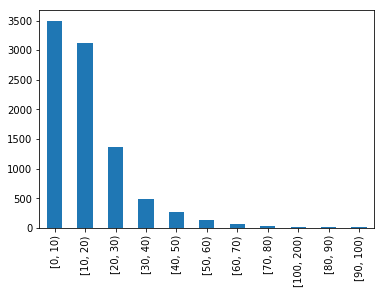

In [9]:
data_len = df.review.apply(lambda x: len(x.split(" ")))

data_len_list = data_len.values.tolist()
# data_len_list
import matplotlib as plt

fenbu_list = [0,10,20,30,40,50,60,70,80,90,100,200]
fenbu_cut = pd.cut(data_len_list,fenbu_list,right=False)
# print(fenbu_cut)
fenbu = pd.value_counts(fenbu_cut)
print(fenbu)

fenbu.plot(kind='bar')
# plt.xlabel('words_long_area')  
# plt.ylabel('counts') 
# plt.show()

In [10]:
max_len = 100
max_features = 10000
embedding_vector_size = 100
tokenizer = Tokenizer(num_words=max_features)       #keeps 6000 most common words
train_test_data = df['review']                       # contains word tokens extracted from lines
tokenizer.fit_on_texts(train_test_data)
sequence = tokenizer.texts_to_sequences(train_test_data)
train_test_data = pad_sequences(sequence, maxlen = max_len)

# Preparing embedding matrix
vocab_size = len(tokenizer.word_index)+1
embedding_matrix = np.zeros((vocab_size, embedding_vector_size))
# # +1 is done because i starts from 1 instead of 0, and goes till len(vocab)
# for  word, i in tokenizer.word_index.items():
#     try:
#         embedding_vector = model.wv[word]
#     except:
#         embedding_vector = np.zeros(100,)
# #     embedding_vector = model_word_2_vector.wv[word]
#     if embedding_vector is not None:
#         embedding_matrix[i] = embedding_vector

In [5]:
raw_train_data_labeled = pd.read_csv("labeledTrainData.tsv", header=0, delimiter="\t", quoting=3)
raw_test_data = pd.read_csv("testData.tsv", header=0, delimiter="\t", quoting=3)

In [11]:
X_train = train_test_data[:6328,:]
# X_test = train_test_data[:5000,:]
# X = X.reshape(-1,123)
y_train = df_01['sentiment'][:6328]
# y_test = raw_train_data_labeled['sentiment'][:5000]

In [12]:
print(X_train.shape)
print(y_train.shape)

(6328, 100)
(6328,)


In [7]:
X_train[-1:].shape

(1, 500)

In [13]:
class AttLayer(Layer):
    def __init__(self, **kwargs):
        super(AttLayer, self).__init__(** kwargs)

    def build(self, input_shape):
        assert len(input_shape)==3
        # W.shape = (time_steps, time_steps)
        self.W = self.add_weight(name='att_weight', 
                                 shape=(input_shape[1], input_shape[1]),
                                 initializer='uniform',
                                 trainable=True)
        self.b = self.add_weight(name='att_bias', 
                                 shape=(input_shape[1],),
                                 initializer='uniform',
                                 trainable=True)
        super(AttLayer, self).build(input_shape)

    def call(self, inputs):
        # inputs.shape = (batch_size, time_steps, seq_len)
        x = K.permute_dimensions(inputs, (0, 2, 1))
        # x.shape = (batch_size, seq_len, time_steps)
        a = K.softmax(K.tanh(K.dot(x, self.W) + self.b))
        outputs = K.permute_dimensions(a * x, (0, 2, 1))
        outputs = K.sum(outputs, axis=1)
        return outputs

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[2]

In [14]:
word_index = tokenizer.word_index
EMBEDDING_DIM = 100

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=max_len,
                            trainable=True)

In [15]:
sequence_input = Input(shape=(max_len,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_gru = Bidirectional(GRU(64, dropout = 0.1, recurrent_dropout=0.1, return_sequences=True))(embedded_sequences)
l_att = AttLayer()(l_gru)
preds = Dense(1, activation='sigmoid')(l_att)
model = Model(sequence_input, preds)
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 100)          2231900   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 128)          63360     
_________________________________________________________________
att_layer_1 (AttLayer)       (None, 128)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,305,489
Trainable params: 2,305,489
Non-trainable params: 0
___________

In [16]:
history = model.fit(X_train, 
                    y_train, epochs = 5, 
                    batch_size = 128, 
#                     validation_split=0.1,
#                     callbacks = callbacks
                   )

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
6328/6328 [==============================] - 37s 6ms/step - loss: 0.6810 - acc: 0.5596
Epoch 2/5
6328/6328 [==============================] - 29s 5ms/step - loss: 0.5266 - acc: 0.7641
Epoch 3/5
6328/6328 [==============================] - 27s 4ms/step - loss: 0.3723 - acc: 0.8560
Epoch 4/5
6328/6328 [==============================] - 29s 5ms/step - loss: 0.3130 - acc: 0.8843
Epoch 5/5
6328/6328 [==============================] - 27s 4ms/step - loss: 0.2553 - acc: 0.9102


In [ ]:
# history = model.fit(X_train, 
#                     y_train, epochs = 30, 
#                     batch_size = 128, 
#                     validation_data=(X_test, y_test),
#                     callbacks = [learning_rate_reduction]
#                    )

In [17]:
model.save('model_预选赛_03.h5')

In [55]:
train_test_data.shape

(9040, 100)

In [18]:
X_sub = train_test_data[6328:,:]
y_pred = model.predict(X_sub)

In [19]:
y_pred.shape

(2712, 1)

In [20]:
y_pred = y_pred.reshape(-1,)
predictions = pd.Series(y_pred)
ids = df_02['ID']
submission = pd.DataFrame({'ID': ids, 'Pred':predictions})

In [21]:
submission
submission.to_csv('预选赛.csv',index=False)

In [22]:
submission

,ID,Pred
0,1,0.012895
1,2,0.907084
2,3,0.841178
3,4,0.181163
4,5,0.872252
5,6,0.017146
6,7,0.967040
7,8,0.856211
8,9,0.931200
9,10,0.882380


In [12]:
X_sub = train_test_data[6328:,:]
y_pred = model.predict(X_sub)
y_pred = y_pred.reshape(-1,)
# predictions = [1 if (x>0.5) else 0 for x in y_pred ]
predictions = pd.Series(y_pred)
ids = raw_test_data['id'].str.replace('"', '')
submission = pd.DataFrame({'id': ids, 'sentiment':predictions})
submission.to_csv('submission_0301.csv',index=False)
y_preds = model.predict(X_test)
y_preds = y_preds.reshape(-1,)
x_stack = pd.Series(y_preds)

y_stack = pd.Series(y_test)

sub_stack = pd.DataFrame({'x_stack': x_stack, 'y_stack':y_stack})
sub_stack.to_csv('sub_stack_0301.csv',index=False)

In [13]:
from keras.utils import plot_model
plot_model(model, show_shapes=1, to_file='model_3.png')